##        Analysis of the Survey
# Refinements in Java - Syntax

The survey aimed to assess the **best syntax for the implementation of Refinement Types in Java**. 

Refinement types have been proposed as an incremental approach for program verification that is directly embedded in the programming language. We propose the usage of Refinement Types within the Java programming language not only as a means for program verification but also for fault localization and efficient mutation in the context of software repair.

The survey was conducted in the context of the master thesis "LiquidJava: Extending Java with Refinements" by Catarina Gamboa, advised by professor Alcides Fonseca, at Lasige, Faculdade de Ciências da Universidade de Lisboa.

The survey was open for 7 weeks, from 2020/12/03 to 2021/01/22, and had a total of **53** answers which will be analysed in thoughout this document.

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_answers (csv_file):
    lines = open(csv_file, 'r').readlines()
    ans_matrix = []
    for l in lines:
        l = l.rstrip('\n')

        ans = l.split(",")
        #only get answers and not lines with the final comment
        if(ans != [] and ans[0]!= "" and 
           (ans[0][1:5] == "2020" or ans[0][1:5] == "2021")):
            ans = ans[1:18] #remove timestamp, comments and email
            for i in range(len(ans)) :
                ans[i] = re.sub('\=.*', '', ans[i])
                ans[i] = re.sub('"', '', ans[i])
            ans_matrix.append(ans)
    return ans_matrix

answers_array = load_answers('Refinements in Java - Syntax.csv')
print("Number of answers:", len(answers_array),"\n")

Number of answers: 53 



In [2]:
notFamiliar, vagFamiliar, familiar, veryFamiliar = \
'Not familiar', 'Vaguely familiar', 'Familiar', 'Very familiar'
notAccept, accept, pref = 'Not acceptable', 'Acceptable', 'Preferable'
fJava, fFun, fJML, fRefs = "fam_java","fam_functional","fam_jml", "fam_refs"
wildC, var, mets, alias, ghost = "wildcard_", "variables_", "methods_", "alias_", "ghost_"


column_names = [fJava, fFun, fJML, fRefs]
column_names += [wildC + str(i) for i in range(3)]
column_names += [var + str(i) for i in range(2)]
column_names += [mets + str(i) for i in range(2)]
column_names += [alias + str(i) for i in range(3)]
column_names += [ghost + str(i) for i in range(3)]
answers_pd = pd.DataFrame(answers_array, columns=column_names)
answers_pd[:5]#showcase

,fam_java,fam_functional,fam_jml,fam_refs,wildcard_0,wildcard_1,wildcard_2,variables_0,variables_1,methods_0,methods_1,alias_0,alias_1,alias_2,ghost_0,ghost_1,ghost_2
0,Familiar,Vaguely familiar,Familiar,Vaguely familiar,Acceptable,Preferable,Preferable,Preferable,Acceptable,Preferable,Acceptable,Preferable,Acceptable,Preferable,Preferable,Acceptable,Preferable
1,Familiar,Vaguely familiar,Not familiar,Not familiar,Not acceptable,Preferable,Acceptable,Acceptable,Preferable,Acceptable,Not acceptable,Preferable,Not acceptable,Acceptable,Acceptable,Acceptable,Acceptable
2,Familiar,Not familiar,Vaguely familiar,Not familiar,Acceptable,Preferable,Not acceptable,Preferable,Acceptable,Acceptable,Preferable,Acceptable,Acceptable,Preferable,Not acceptable,Not acceptable,Preferable
3,Very familiar,Vaguely familiar,Not familiar,Not familiar,Not acceptable,Preferable,Acceptable,Preferable,Not acceptable,Acceptable,Not acceptable,Acceptable,Preferable,Not acceptable,Not acceptable,Preferable,Acceptable
4,Familiar,Familiar,Not familiar,Vaguely familiar,Preferable,Acceptable,Not acceptable,Preferable,Acceptable,Preferable,Acceptable,Acceptable,Acceptable,Not acceptable,Preferable,Acceptable,Acceptable


# 1. Background Information - Familiarity with tools
This section aims to understand the background of respondents of the survey.

In [3]:
from matplotlib_venn import venn2, venn2_circles
import random
import math
def getFamiliaritySize(pd, colName):
    a = len(pd.loc[pd[colName]== notFamiliar])
    b = len(pd.loc[pd[colName]== vagFamiliar])
    c = len(pd.loc[pd[colName]== familiar])
    d = len(pd.loc[pd[colName]== veryFamiliar])
    return [d,c,b,a]

def donutChart(pd, title, colName):
    # The slices will be ordered and plotted counter-clockwise.
    labels = [notFamiliar, vagFamiliar, familiar, veryFamiliar][::-1]
    sizes = getFamiliaritySize(pd, colName)
    colors = ['yellowgreen', 'gold', 'turquoise', 'tomato']#lightcoral
    explode = (0, 0, 0, 0)  # explode a slice if required

    patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True)
    [autotexts[i].set_fontsize(14) for i in range(4)]

    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.suptitle(title, fontsize=18, fontweight='bold')
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    

def horizontalBarsPlot(title, pd, colName, palette="rocket", percentage=True): 
    lSize = getFamiliaritySize(pd, colName)
    maxY = max(lSize)
    x = 8 if maxY > 10 else 4
    f, axs = plt.subplots(1, 1, figsize=(x, 6), sharex=True)
    f.suptitle(title, fontsize=16)
    sns.set_theme(style="white", context="talk")
    
    x = np.array(["Not Familiar", "Vaguely Familiar","Familiar","Very Familiar"][::-1])
    y1 = np.array(lSize)
    splot = sns.barplot(x=y1, y=x, palette=palette, ax=axs)
    
    
    i = 0
    for p in splot.patches:
        height = int(lSize[i]) if not percentage else'{:.1f}'.format((lSize[i]/sum(lSize))*100)+"%"
        splot.annotate(height, 
               (p.get_x()+lSize[i]+1 , p.get_height()+i-0.7), 
               ha = 'left', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        i+=1
    axs.set_xlim([0, maxY+5])
    
def vennTwo(size1, size2, sizeJoin, lb1, lb2, title, colors=('r', 'g'), alpha=0.7):
    out = venn2(subsets = (size1-sizeJoin, size2-sizeJoin, sizeJoin), 
      set_labels = (lb1, lb2), alpha = alpha, set_colors=colors)
    #venn2_circles(subsets = (sizeFamFun-sizeJoin, sizeFamRef-sizeJoin, sizeJoin))
    for text in out.set_labels:
        text.set_fontsize(14)

    lbl = out.get_label_by_id("A")
    x, y = lbl.get_position()
    lbl.set_position((x-0.5, y+0.4)) 

    lbl = out.get_label_by_id("B")
    x, y = lbl.get_position()
    lbl.set_position((x+0.3, y+0.2)) 
    plt.title(title)


### 1.1 Familiarity with Java
Once the survey aims to access the best syntax for the usage of Refinements in Java it is important that the respondents have some familiarity with the language, otherwise the answers may not be demonstrative of the population that uses Java and that might use the Refinements for Java.

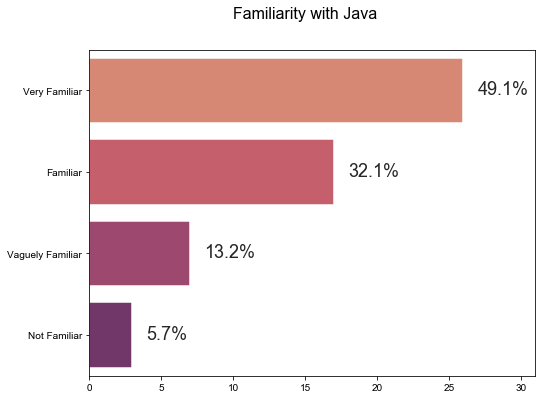

In [4]:
horizontalBarsPlot("Familiarity with Java", answers_pd, fJava, palette="flare", percentage=True)

The chart above shows that some respondents marked the option *"Not familiar"* with Java which raises the question if these answers should be used in the study. To access this, we can analyse the other familiarity answers of these respondents.

In [5]:
answers_pd.loc[answers_pd[fJava]== notFamiliar]

,fam_java,fam_functional,fam_jml,fam_refs,wildcard_0,wildcard_1,wildcard_2,variables_0,variables_1,methods_0,methods_1,alias_0,alias_1,alias_2,ghost_0,ghost_1,ghost_2
38,Not familiar,Not familiar,Not familiar,Not familiar,Preferable,Preferable,Preferable,Acceptable,Preferable,Acceptable,Preferable,Preferable,Preferable,Acceptable,Acceptable,Preferable,Preferable
40,Not familiar,Not familiar,Not familiar,Not familiar,Acceptable,Preferable,Acceptable,Acceptable,Preferable,Preferable,Acceptable,Acceptable,Acceptable,Preferable,Acceptable,Preferable,Acceptable
50,Not familiar,Very familiar,Not familiar,Vaguely familiar,Not acceptable,Acceptable,Preferable,Preferable,Acceptable,Preferable,Acceptable,Not acceptable,Preferable,Acceptable,Acceptable,Acceptable,Acceptable


The 5.7% of respondants not familiar with Java correspond to 3 of the answers of the survey. Once the aim of this study is to evaluate the best syntax to integrate refinement types in the Java language, the answers with no background on Java will be dircarded.

Moreover, from these three answers, two marked the remaining background questions as *"Not Familiar"* which confirms that the responders are not inserted in the target population.

In [6]:
answers_pd = answers_pd.drop(38)
answers_pd = answers_pd.drop(40)
answers_pd = answers_pd.drop(50)

### 1.2 Familiarity with Functional Languages
The first implementations of Refinement Types were developed in functional languages. In this survey, some of the proposed syntaxes follow similar lines to other implementations of refinements types, hence, have some similarities to functional languages syntaxes.

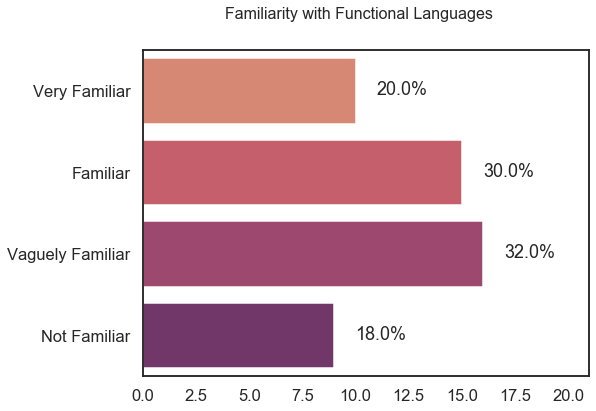

In [7]:
horizontalBarsPlot("Familiarity with Functional Languages", answers_pd, fFun, palette="flare")

### 1.3 Familiarity with JML
Java Modeling Language is a specification language created for Java. 

With the addition of the refinements we are also adding specifications to Java code, which means that the syntax chosen will serve as a specification language.

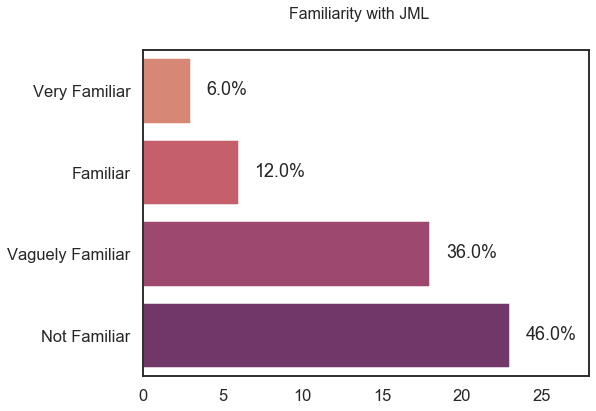

In [8]:
horizontalBarsPlot("Familiarity with JML", answers_pd, fJML, palette="flare", percentage=True)

### 1.4 Familiarity with Refinement Types

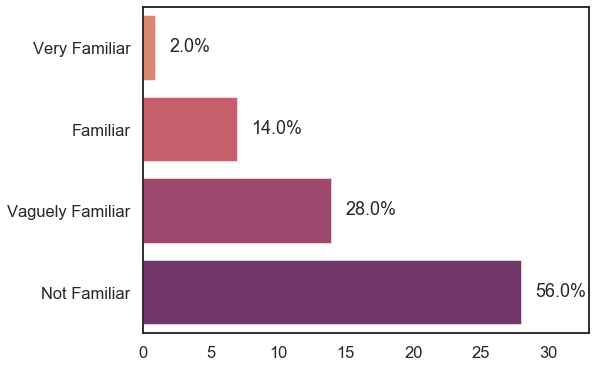

In [9]:
horizontalBarsPlot("", answers_pd, fRefs, palette="flare", percentage=True)

From this point on when a responder is identified as *familiar* with a tool/concept they can have answered *Familiar* or *Very Familiar* in the background questions.

It is expected that the responders that are familiar with Refinement Types are also familiar with functional languages once most of the implementations of refinements types are developed in functional languages. The next diagram confirms this expectation, once all but 1 of the reponders familiar with refinements types are also familiar with functional languages.

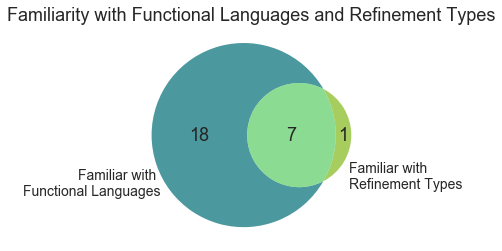

In [10]:
sizeFamRef = len(answers_pd.loc[(answers_pd[fRefs] == veryFamiliar) | (answers_pd[fRefs] == familiar)])
sizeFamFun = len(answers_pd.loc[(answers_pd[fFun] == veryFamiliar) | (answers_pd[fFun] == familiar)])
sizeJoin = len(answers_pd.loc[((answers_pd[fFun]== veryFamiliar) | (answers_pd[fFun]== familiar)) & ((answers_pd[fRefs]== veryFamiliar) | (answers_pd[fRefs]== familiar))])
lb1 = 'Familiar with \nFunctional Languages'
lb2 = 'Familiar with \nRefinement Types'
vennTwo(sizeFamFun, sizeFamRef, sizeJoin, lb1, lb2, "Familiarity with Functional Languages and Refinement Types", colors=('#006d77', '#80b918'))

From the responders familiar with Refinement Types, two of them are also familiar with JML which is interesting once both have different contributions to program verification. However most of the reponders familiar with JML are not familiar with refinement types and vice-versa.

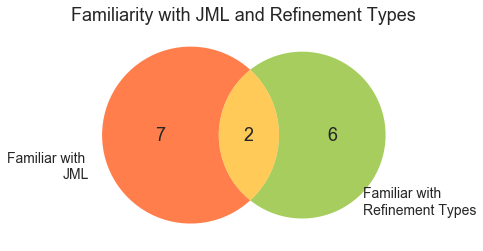

In [11]:
sizeFamRef = len(answers_pd.loc[(answers_pd[fRefs] == veryFamiliar) | (answers_pd[fRefs] == familiar)])
sizeFamJML = len(answers_pd.loc[(answers_pd[fJML] == veryFamiliar) | (answers_pd[fJML] == familiar)])
sizeJoin = len(answers_pd.loc[((answers_pd[fRefs]== veryFamiliar) | (answers_pd[fRefs]== familiar)) & ((answers_pd[fJML] == veryFamiliar) | (answers_pd[fJML] == familiar))])
lb1 = 'Familiar with \nJML'
lb2 = 'Familiar with \nRefinement Types'
vennTwo(sizeFamJML, sizeFamRef, sizeJoin, lb1, lb2, "Familiarity with JML and Refinement Types", colors=('#ff4800', '#80b918'))

# 2. Preferences on the Syntax

In [12]:
def getListSizes(pd, colName):
    a = len(pd.loc[answers_pd[colName]== notAccept])
    b = len(pd.loc[answers_pd[colName]== accept])
    c = len(pd.loc[answers_pd[colName]== pref])
    return [a,b,c]


def barsPlot(title, labelNames, pd, column_prefix, indexes, palette="rocket", zoomX=0, zoomY=0, percentage=False):
    size = len(indexes)
    figXsize = 7*size if size < 3 else 6*size; 
    f, axs = plt.subplots(1, size, figsize=(figXsize+zoomX, 5+zoomY), sharex=True)
    f.suptitle(title, fontsize=16)
    sns.set_theme(style="white", context="talk")
    maxY = 0
    for i in range(size):
        lSize = getListSizes(pd, column_prefix+str(indexes[i]))
        x = np.array(["Not Accept.", "Acceptable","Preferable"])
        y1 = np.array(lSize)
        splot = sns.barplot(x=x, y=y1, palette=palette, ax=axs[i])
        axs[i].axhline(0, color="k", clip_on=False)
        axs[i].set_xlabel(labelNames[i], fontsize=15+zoomX)
        maxY = max(lSize) if max(lSize) > maxY else maxY
        for p in splot.patches:
            height =  int(p.get_height()) if not percentage else '{:.1f}'.format((p.get_height()/sum(lSize))*100)+"%" 
            splot.annotate(height, 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    for i in range(size):
        axs[i].set_ylim([0, maxY+4])
        

## 2.1  Wildcard Variable

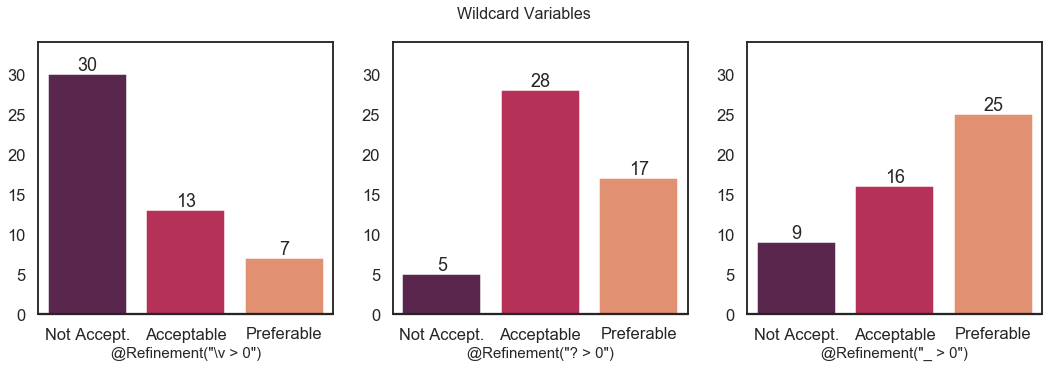

In [13]:
labelNames = ['@Refinement("\\v > 0")', '@Refinement("? > 0")', '@Refinement("_ > 0")']
barsPlot("Wildcard Variables", labelNames, answers_pd, wildC, range(3))

From the gathered answers the first option can be discarded as a possible syntax due to the high rate of *"Not Acceptable"* answers compared to the others.

To choose between the second and the third options, a more detailed approach needs to be taken. 

The **"?"** option has the lowest rate of *"Not Acceptable"* and the highest rate of *"Acceptable"* but contains less *"Preferable"* answers than the **"_"** option. While the 3rd option has an higher rate of *"Not Acceptable"* answers, a lower rate of "Acceptable" ones and the highest number of *"Preferable"*. This leads to an inconclusive answers to which option should be used in the refinements. 

To differentiate the last two approaches, it was decided analyse the sideffects of removing the answers that marked the first option(already excluded) as *"Preferable"*.
The remotion effects are shown in the plot below.

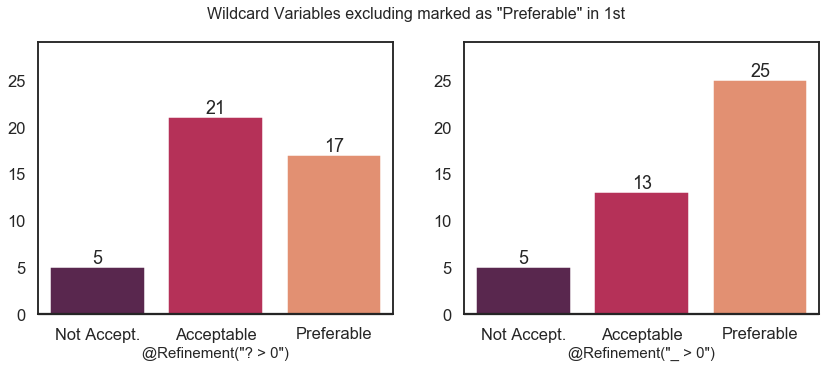

In [14]:
answers_pd2 = answers_pd.copy() 
answers_pd2.drop(answers_pd2 .loc[answers_pd2["wildcard_0"] == pref].index, inplace=True)
labelNames = labelNames[1:]
barsPlot('Wildcard Variables excluding marked as "Preferable" in 1st', labelNames, answers_pd2, wildC, [1,2])

Without counting with the answers that prefered the 1st option, the rate of *"Not Acceptable"* answers is the same for the 2nd and 3rd options, while the *"Preferable"* rate stays the same.

**This leads to the choice of _ as the Wildcard Variable.**

## 2.2 Variable Refinements

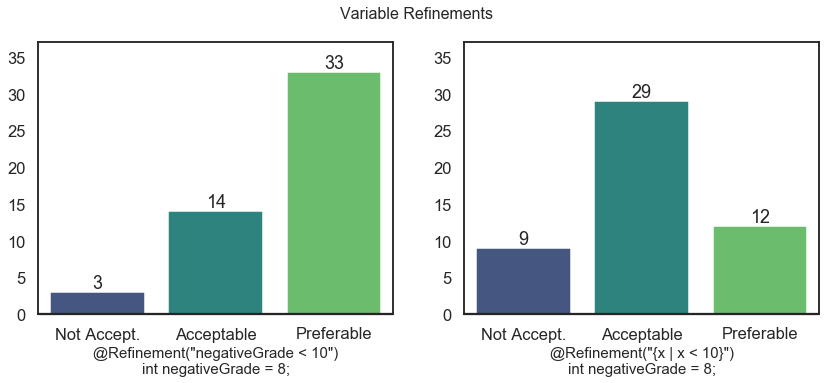

In [15]:
labelNames = ['@Refinement("negativeGrade < 10")\nint negativeGrade = 8;', 
              ""'@Refinement("{x | x < 10}")\nint negativeGrade = 8;']
barsPlot("Variable Refinements", labelNames, answers_pd, var, range(2), palette="viridis")

From this answers we can conclude that the first option was the preferable one. Although, it is possible to see that the second option was also acceptable, and the rate of "Not Acceptable" answers was quite low in both options.

This leads to the choice of the **first option** as the Syntax for the Refinements in Variables.

## 2.3 Refinements in Methods

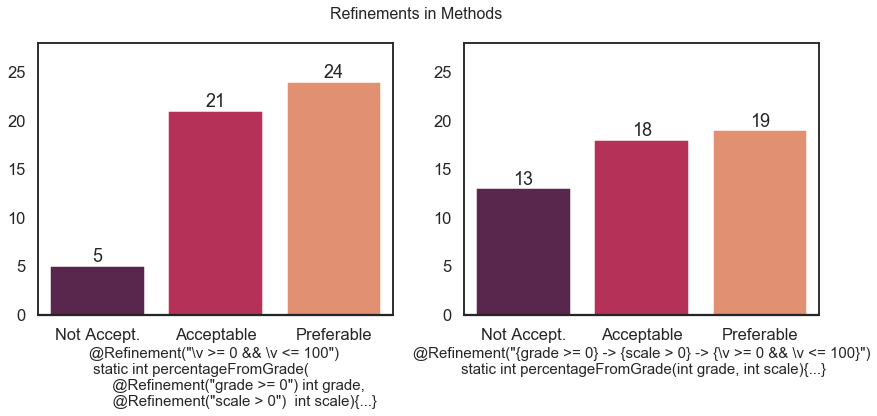

In [16]:
labelNames = ['@Refinement("\\v >= 0 && \\v <= 100") \n static int percentageFromGrade(        \n           @Refinement("grade >= 0") int grade,\n              @Refinement("scale > 0")  int scale){...}', 
              '@Refinement("{grade >= 0} -> {scale > 0} -> {\\v >= 0 && \\v <= 100}")\n static int percentageFromGrade(int grade, int scale){...}']
barsPlot("Refinements in Methods", labelNames, answers_pd, mets, range(2))

This answers show a preference for the first syntax over the second, once the first has an higher rate of *"Preferable"* answers and a lower rate of *"Not Acceptable"* answers.

By this analysis the **chosen option is the first one**.

## 2.4 Refinement Alias

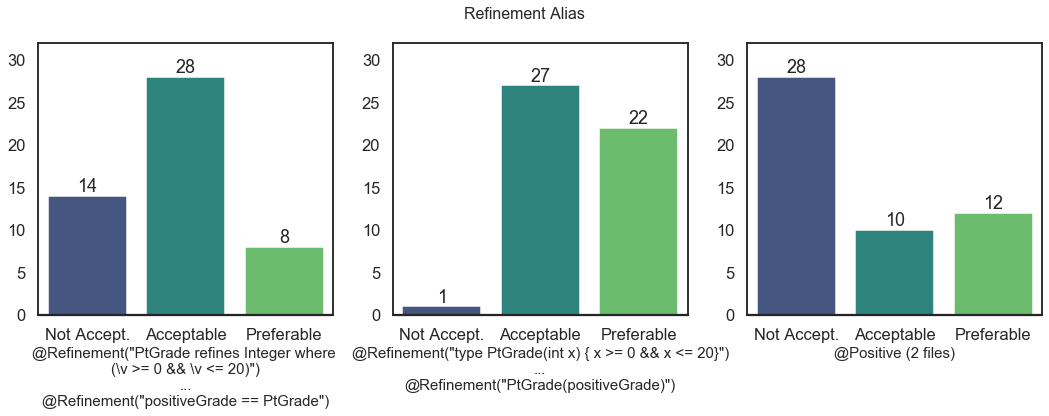

In [17]:
labelNames = ['@Refinement("PtGrade refines Integer where \n(\\v >= 0 && \\v <= 20)")\n...\n@Refinement("positiveGrade == PtGrade")',
              '@Refinement("type PtGrade(int x) { x >= 0 && x <= 20}")\n...\n@Refinement("PtGrade(positiveGrade)")',
              '@Positive (2 files)']
barsPlot("Refinement Alias", labelNames, answers_pd, alias, range(3), palette='viridis')

For the alising of refinements, the second option shows the best answers, once it has the lowest number of *"Not Acceptable"* answers and the highest of *"Preferable"* ones.

This concludes that the **second option** is the chosen for the refinement alias.

## 2.5 Ghost/Uninterpreted Functions

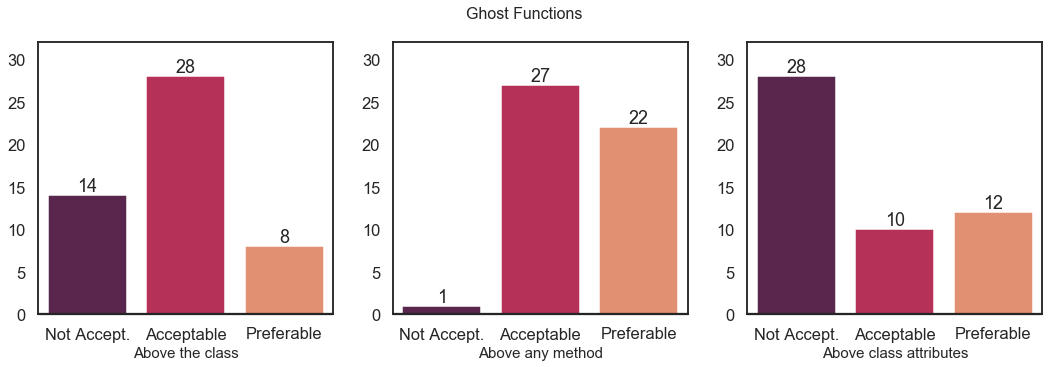

In [18]:
labelNames = ['Above the class', 
              'Above any method', 
              'Above class attributes']
barsPlot("Ghost Functions", labelNames, answers_pd, alias, range(3))

The second choice is a clear choice for the positioning of the ghost functions, once it obtained the lowest number of *"Not Acceptable"* answers and the highest number of *"Preferable"* answers.

The chosen option for the ghost functions is the **second** one.

# 3. Other considerations

## 3.1 Refinements inspired in Functional Languages and Responders Answers
Along this survey there were two refinements options strongly inspired by the syntax used in functional languages and in refinements for functional languages - specifically LiquidHaskell:
* ***@Refinement("{x | x < 10}")*** - This is similar to the syntax to add a refinement to a variable in LiquidHaskell
* ***@Refinement("{grade >= 0} -> {scale > 0} -> {\\v >= 0 && \\v <= 100}")*** - The use of -> is a common way to specify the function types in functional languages, where the item after the last arrow refers to the return and all the items before refere to the parameters of the function. In LiquidHaskell the use of the arrow is combined with the braces to identify the the refinements for each of the parameters and the return

In this subsection we try to evaluate if the background of familiarity with functional languages is linked to the preference on each of this syntaxes. For this we select a total of 26 answers out of the 50 used throughout the study.

In [19]:
functional_pd = pd.concat([answers_pd.loc[answers_pd[fFun]== veryFamiliar], answers_pd.loc[answers_pd[fFun]== familiar]])
len(functional_pd)

25

In [31]:
def stackPlot(pd1, pd2, colName, title, xleg, colorBot='#e35430', colorUp="#ff8630", 
              lg1='Familiar with Functional Languages', lg2='Remaining sample'):
    #Set general plot properties
    sns.set_style("white")
    sns.set_context({"figure.figsize": (6, 5)})
    sns.set_theme(style="white", context="talk")
         
    #Plot 1 - background - "total" (top) series
    lSize = getListSizes(pd1, colName)
    x = np.array(["Not Accept.", "Acceptable","Preferable"])
    y1 = np.array(lSize)
    splot = sns.barplot(x=x, y=y1, color = colorUp)

    #Plot 2 - overlay - "bottom" series
    lSize = getListSizes(pd2, colName)
    x = np.array(["Not Accept.", "Acceptable","Preferable"])
    y1 = np.array(lSize)
    bottom_plot = sns.barplot(x = x, y = y1, color = colorBot)

    topbar = plt.Rectangle((0,0),0,0,fc=colorUp, edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),0,0,fc=colorBot,  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], [lg1, lg2], 
                   loc=2, ncol = 1, prop={'size':10})
    l.draw_frame(False)
    plt.suptitle(title, size=14)

    #Optional code - Make plot look nicer
    sns.despine(left=False)
    bottom_plot.set_ylabel("Number of answers")
    bottom_plot.set_xlabel(xleg)

    #Set fonts to consistent 16pt size
    for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
                 bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
        item.set_fontsize(12)

#### 3.1.1 Refinements in Variables

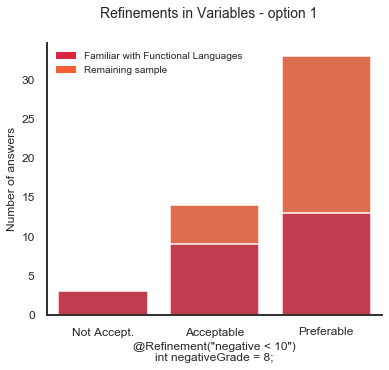

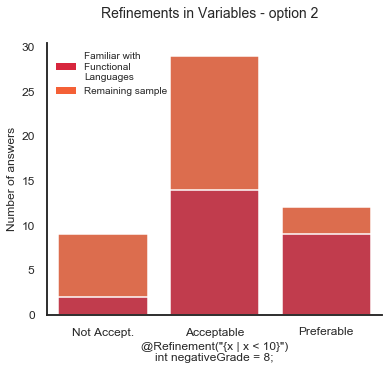

In [34]:
stackPlot(answers_pd, functional_pd, var+"0", "Refinements in Variables - option 1", 
          '@Refinement("negative < 10")\nint negativeGrade = 8;', colorBot="#d7263d", colorUp="#f46036")
plt.figure().clear()
stackPlot(answers_pd, functional_pd, var+"1", "Refinements in Variables - option 2", 
          '@Refinement("{x | x < 10}")\nint negativeGrade = 8;', colorBot="#d7263d", colorUp="#f46036",
          lg1 ='Familiar with \nFunctional \nLanguages')


There is **no clear difference** between the responders that are acquainted with functional languages and the global sample once both graphics show similar results and a preference for the first option. 

However we can see that all the answers that mark the first option as *Not Acceptable* are from responders that are familiar with functional languages and that prefered the second option.

In [22]:
answers_pd.loc[answers_pd[var+"0"]== notAccept][[fFun, var+'0', var+'1']]

,fam_functional,variables_0,variables_1
27,Familiar,Not acceptable,Preferable
31,Very familiar,Not acceptable,Preferable
49,Very familiar,Not acceptable,Preferable


#### 3.1.2 Refinements in Methods

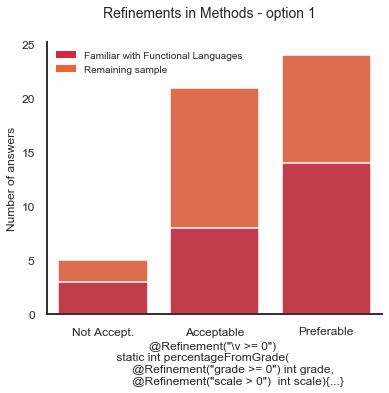

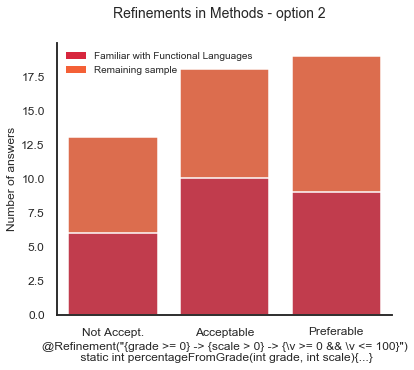

In [23]:
labelNames = ['@Refinement("\\v >= 0") \n static int percentageFromGrade(        \n           @Refinement("grade >= 0") int grade,\n              @Refinement("scale > 0")  int scale){...}', 
              '@Refinement("{grade >= 0} -> {scale > 0} -> {\\v >= 0 && \\v <= 100}")\n static int percentageFromGrade(int grade, int scale){...}']
stackPlot(answers_pd, functional_pd, mets+"0", "Refinements in Methods - option 1", labelNames[0], colorBot="#d7263d", colorUp="#f46036")
plt.figure().clear()
stackPlot(answers_pd, functional_pd, mets+"1", "Refinements in Methods - option 2", labelNames[1], colorBot="#d7263d", colorUp="#f46036")

Again, the results of the responders acquainted with Functional Languages **are similar** to the global sample. In the charts above we can see that the bars follow a similar distribution of answers from the reponders familiar and not familiar with functional languages.

#### Conclusion
Neither of the cases strongly inspired by functional languages show a discrepancy between the total of responders and the responders familiar with Functional Languages, which leads to the conclusion that there the familiarity with functional languages was not a big influence in the choices of the syntax.

## 3.2 Further Comparison between Background and Answers

In [24]:
listFamiliarCat = [notFamiliar, vagFamiliar, familiar, veryFamiliar][::-1]
listPreferenceCat = [notAccept, accept, pref]

def setCategorical(df, column_names, cats, jitter=False):
    df = df.copy() 
    for cat in column_names:
        df[cat] = df[cat].astype(pd.api.types.CategoricalDtype(categories = cats, ordered=True))
        cat_columns = df.select_dtypes(['category']).columns
        
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes if not jitter else np.random.uniform(x.cat.codes-0.15, x.cat.codes+0.15))
    return df

def pairPlot(df, y, first_columns, cats=listFamiliarCat, pal='tab10',hue=None):
    df[y] = df[y].astype(pd.api.types.CategoricalDtype(categories = cats, ordered=True))
    h = y if hue == None else hue
    sns.set_theme(style="ticks")
    sns.pairplot(df, y_vars=[y], x_vars=first_columns, hue=h, palette=pal, diag_kind = None)
    sns.pairplot(df, y_vars=[y], x_vars=column_names[4:9], hue=h, palette=pal, diag_kind = None)
    sns.pairplot(df, y_vars=[y], x_vars=column_names[9:-3], hue=h, palette=pal, diag_kind = None)
    sns.pairplot(df, y_vars=[y], x_vars=column_names[-2:], hue=h, palette=pal, diag_kind = None)

In [25]:
answersCat_pd = setCategorical(answers_pd, column_names[4:], [notAccept, accept, pref], jitter=True)
answersCat_pd[:5]

,fam_java,fam_functional,fam_jml,fam_refs,wildcard_0,wildcard_1,wildcard_2,variables_0,variables_1,methods_0,methods_1,alias_0,alias_1,alias_2,ghost_0,ghost_1,ghost_2
0,Familiar,Vaguely familiar,Familiar,Vaguely familiar,1.036466,1.854860,1.919850,1.871057,1.012073,2.000292,1.080035,2.011106,0.944234,1.932103,2.047908,0.929535,1.891294
1,Familiar,Vaguely familiar,Not familiar,Not familiar,-0.103139,2.014862,0.919588,1.042231,2.095555,0.998813,0.023159,2.141464,-0.075332,0.892542,0.995340,0.943088,1.022749
2,Familiar,Not familiar,Vaguely familiar,Not familiar,0.926622,1.921106,-0.113750,1.904940,1.133095,0.915847,2.098737,0.893047,0.870273,2.083070,-0.069212,-0.068276,2.001543
3,Very familiar,Vaguely familiar,Not familiar,Not familiar,0.008389,2.066549,1.097849,2.020395,0.023108,0.892661,-0.005889,0.977401,1.913233,0.033333,0.064072,2.094143,1.055553
4,Familiar,Familiar,Not familiar,Vaguely familiar,2.134275,0.969002,0.131739,1.927085,0.866959,2.079158,1.050531,1.077735,0.868814,0.057139,2.026258,1.101987,1.074474


##### 3.2.1 Pair Plot - Familiarity with Java and answers

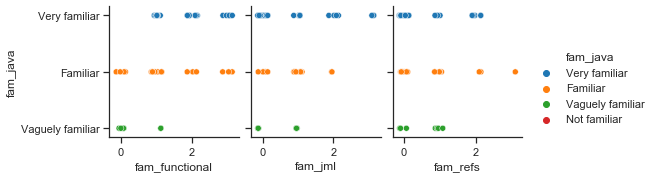

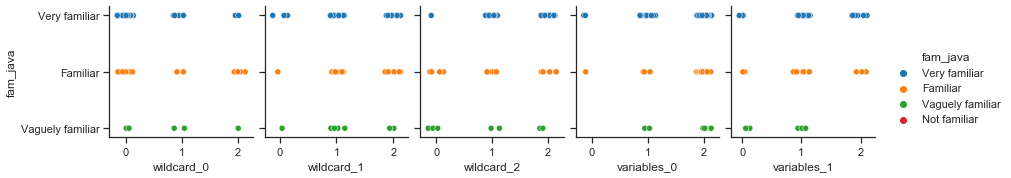

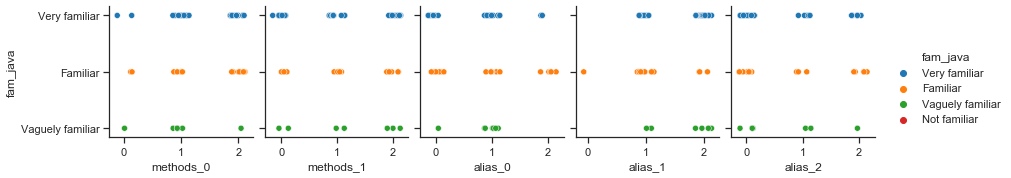

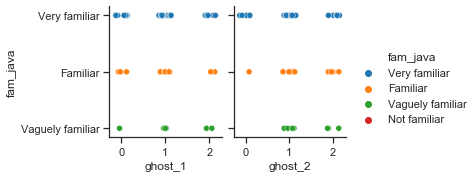

In [26]:
allCat_pd = setCategorical(answersCat_pd, [fFun, fJML, fRefs], 
                                   [notFamiliar, vagFamiliar, familiar, veryFamiliar], jitter=True)
pairPlot(allCat_pd, fJava, column_names[1:4])

##### 3.2.2 Pair Plot - Familiarity with Functional Languages and Answers

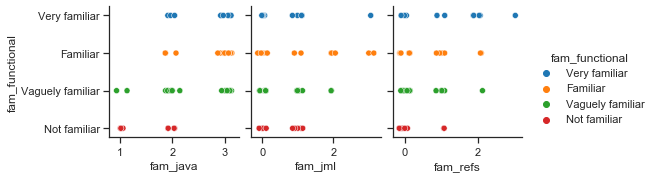

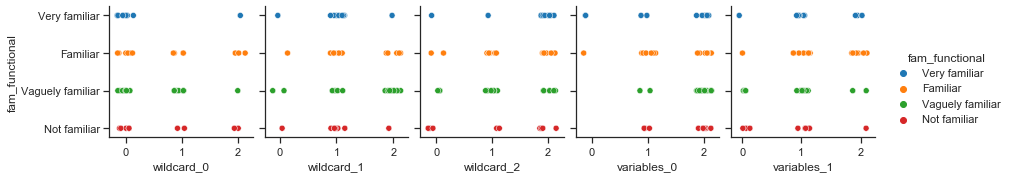

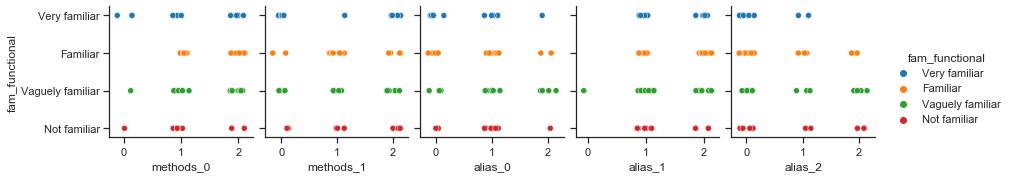

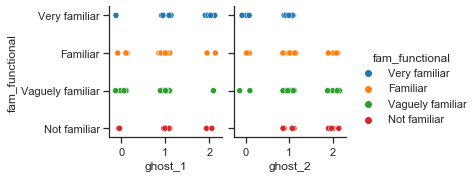

In [27]:
all_pd = setCategorical(answersCat_pd, [fJava, fJML, fRefs], 
                                   [notFamiliar, vagFamiliar, familiar, veryFamiliar], jitter=True)
pairPlot(all_pd, fFun, [column_names[0]]+column_names[2:4])

##### 3.2.3 Pair Plot - Familiarity with JML and Answers

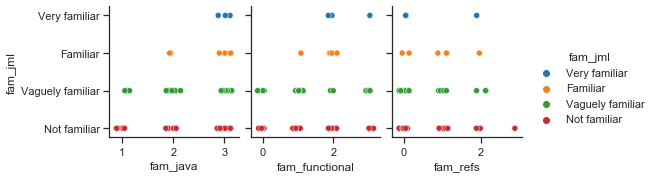

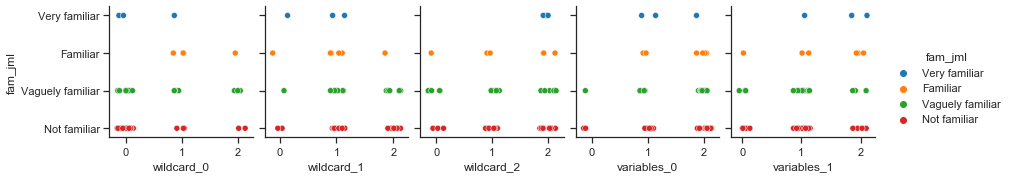

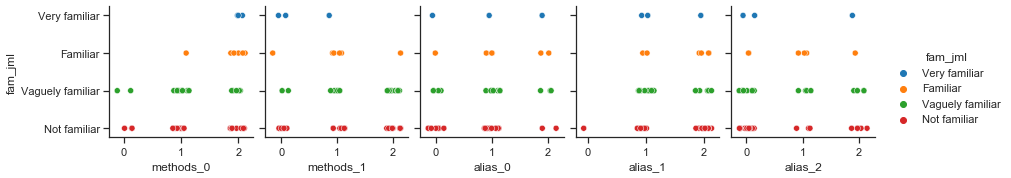

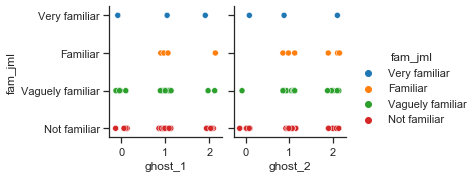

In [28]:
all_pd = setCategorical(answersCat_pd, [fJava, fFun, fRefs], 
                                   [notFamiliar, vagFamiliar, familiar, veryFamiliar], jitter=True)
pairPlot(all_pd, fJML, column_names[:2]+[column_names[3]])

##### 3.2.4 Pair Plot - Familiarity with Refinements and Answers

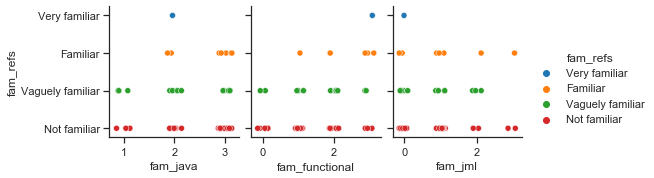

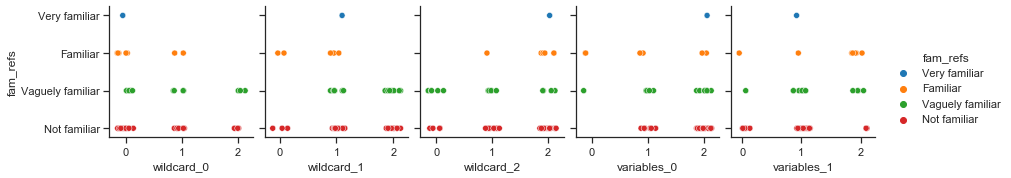

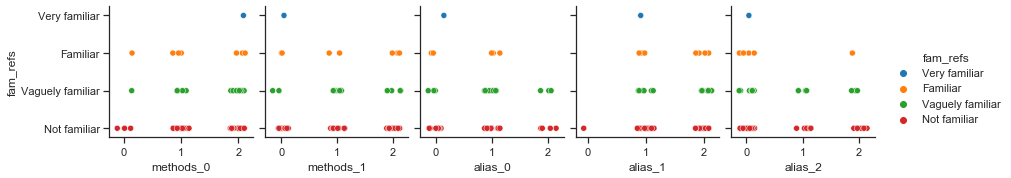

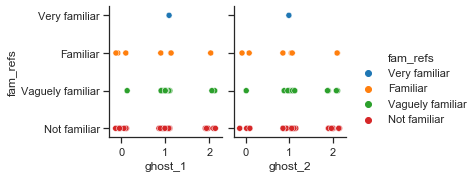

In [29]:
all_pd = setCategorical(answersCat_pd, [fJava, fFun, fJML], 
                                   [notFamiliar, vagFamiliar, familiar, veryFamiliar], jitter=True)
pairPlot(all_pd, fRefs, column_names[:3])

## 4. Final Comments
This section includes some comments considered interesting.

* Would it be possible to **"reflect"** java functions into "ghost" versions (to be called in refinements)? In a similar way to Liquid Haskell's --reflect. It does seem like doing this with imperative functions might be strange though.


* I'd use **@RefinementFunction("int", "len", "List")** for ghost functions instead of @Refinement (and varargs if there is more than one argument). Syntactically it's significantly different from other refinements. At the very least I wouldn't bind ghost function arguments, i.e. "int len(List)" instead of "int len(List xs)". Similarly, I'd use **@RefinementType("PtGrade", "int", "_ >= 0 && _ <= 20")** instead of the provided examples (and _1 _2 or %1 %2 if types accept more than one argument).